# 시작

In [71]:

# 모듈 불러오기
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  
import seaborn as sns
import pandas as pd
import numpy as np

# 폰트조절

from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)  

# 데이터 불러오기
image = pd.read_csv('Medical_Image_Data_01.csv', encoding='cp949')
diagnosis = pd.read_csv('Patient_Diagnosis_Data.csv')
surgery = pd.read_csv('Patient_surgery_Data.csv')

In [72]:
image.head() # 이미지데이터 확인

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0


In [73]:
image.info() # 이미지 데이터 데이트타입확인   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   환자ID            1894 non-null   object 
 1   전방디스크높이(mm)     1894 non-null   float64
 2   후방디스크높이(mm)     1894 non-null   float64
 3   지방축적도           1891 non-null   float64
 4   Instability     1894 non-null   int64  
 5   MF + ES         1894 non-null   float64
 6   Modic change    1894 non-null   int64  
 7   PI              1890 non-null   float64
 8   PT              1890 non-null   float64
 9   Seg Angle(raw)  1893 non-null   float64
 10  Vaccum disc     1894 non-null   int64  
 11  골밀도             998 non-null    float64
 12  디스크단면적          1893 non-null   float64
 13  디스크위치           1894 non-null   int64  
 14  척추이동척도          1894 non-null   object 
 15  척추전방위증          1894 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 236.9+ KB


In [74]:
diagnosis.head() # 진단데이터 확인

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,입원일자,종양진행여부,직업,체중,퇴원일자,헤모글로빈수치,혈전합병증여부,환자통증정도,흡연여부,통증기간(월)
0,1PT,22.8,3,51.0,0.0,0,0,0,0,0,...,20190713,0,자영업,60.3,20190716,13.66,0,10,0,1.0
1,2PT,44.9,4,26.0,0.0,0,0,0,0,0,...,20190715,0,운동선수,71.7,20190716,13.73,0,10,0,1.0
2,3PT,53.0,3,NaN,0.0,0,0,1,0,0,...,20190729,0,특수전문직,77.1,20190801,15.34,0,7,0,1.0
3,4PT,54.7,4,18.0,0.0,0,1,0,0,0,...,20190731,0,주부,74.2,20190803,15.38,0,7,0,2.0
4,5PT,53.8,4,NaN,0.0,0,1,0,0,0,...,20190903,0,특수전문직,80.7,20190907,13.08,0,7,0,1.0


In [75]:
diagnosis.info() # 진단데이터 데이트타입확인   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   환자ID                    1894 non-null   object 
 1   Large Lymphocyte        1894 non-null   float64
 2   Location of herniation  1894 non-null   int64  
 3   ODI                     462 non-null    float64
 4   가족력                     1843 non-null   float64
 5   간질성폐질환                  1894 non-null   int64  
 6   고혈압여부                   1894 non-null   int64  
 7   과거수술횟수                  1894 non-null   int64  
 8   당뇨여부                    1894 non-null   int64  
 9   말초동맥질환여부                1894 non-null   int64  
 10  빈혈여부                    1894 non-null   int64  
 11  성별                      1894 non-null   int64  
 12  스테로이드치료                 1894 non-null   int64  
 13  신부전여부                   1894 non-null   int64  
 14  신장                      1894 non-null   

In [76]:
surgery.head() # 수술데이터 확인

,환자ID,수술기법,수술시간,수술실패여부,수술일자,신장,연령,입원일자,재발여부,체중,퇴원일자,헤모글로빈수치,환자통증정도,통증기간(월),혈액형
0,1PT,TELD,68.0,0,20190715,163,66,20190713,0,60.3,20190716,13.66,10,1.0,RH+A
1,2PT,TELD,31.0,0,20190716,171,47,20190715,0,71.7,20190716,13.73,10,1.0,RH+A
2,3PT,TELD,78.0,0,20190731,178,39,20190729,0,77.1,20190801,15.34,7,1.0,RH+B
3,4PT,TELD,73.0,0,20190802,174,40,20190731,0,74.2,20190803,15.38,7,2.0,RH+O
4,5PT,TELD,29.0,0,20190906,183,42,20190903,0,80.7,20190907,13.08,7,1.0,RH+A


In [77]:
surgery.info() #수술데이터 데이터타입확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   환자ID     1894 non-null   object 
 1   수술기법     1813 non-null   object 
 2   수술시간     1840 non-null   float64
 3   수술실패여부   1894 non-null   int64  
 4   수술일자     1894 non-null   int64  
 5   신장       1894 non-null   int64  
 6   연령       1894 non-null   int64  
 7   입원일자     1894 non-null   int64  
 8   재발여부     1894 non-null   int64  
 9   체중       1894 non-null   float64
 10  퇴원일자     1894 non-null   int64  
 11  헤모글로빈수치  1893 non-null   float64
 12  환자통증정도   1894 non-null   int64  
 13  통증기간(월)  1890 non-null   float64
 14  혈액형      1894 non-null   object 
dtypes: float64(4), int64(8), object(3)
memory usage: 222.1+ KB


# 데이터 전처리

In [78]:
data = pd.merge(image, diagnosis) # 이미지,진단,수술 데이터 결합
data = pd.merge(data, surgery)
data

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,혈전합병증여부,환자통증정도,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,0,10,0,1.0,TELD,68.0,0,20190715,0,RH+A
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,0,10,0,1.0,TELD,31.0,0,20190716,0,RH+A
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,0,7,0,1.0,TELD,78.0,0,20190731,0,RH+B
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,0,7,0,2.0,TELD,73.0,0,20190802,0,RH+O
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,0,7,0,1.0,TELD,29.0,0,20190906,0,RH+A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,17.0,10.7,237.5,0,2795.7,2,59.5,23.0,21.8,...,0,7,0,12.0,NaN,80.0,0,20170407,0,RH+A
1890,1891PT,9.4,8.2,288.0,0,1473.0,0,47.7,20.2,5.0,...,0,7,0,6.0,NaN,20.0,0,20170427,0,RH+B
1891,1892PT,13.5,5.5,148.5,0,3864.1,0,44.6,15.0,17.4,...,0,7,0,1.0,IELD,50.0,0,20170411,0,RH+O
1892,1893PT,14.0,10.0,89.0,0,2481.8,2,32.2,11.1,17.7,...,0,7,0,24.0,NaN,25.0,0,20170410,0,RH+A


In [79]:
data.columns

Index(['환자ID', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'Large Lymphocyte',
       'Location of herniation', 'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수',
       '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환',
       '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업', '체중', '퇴원일자',
       '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법', '수술시간',
       '수술실패여부', '수술일자', '재발여부', '혈액형'],
      dtype='object')

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   환자ID                    1894 non-null   object 
 1   전방디스크높이(mm)             1894 non-null   float64
 2   후방디스크높이(mm)             1894 non-null   float64
 3   지방축적도                   1891 non-null   float64
 4   Instability             1894 non-null   int64  
 5   MF + ES                 1894 non-null   float64
 6   Modic change            1894 non-null   int64  
 7   PI                      1890 non-null   float64
 8   PT                      1890 non-null   float64
 9   Seg Angle(raw)          1893 non-null   float64
 10  Vaccum disc             1894 non-null   int64  
 11  골밀도                     998 non-null    float64
 12  디스크단면적                  1893 non-null   float64
 13  디스크위치                   1894 non-null   int64  
 14  척추이동척도                  1894 non-null   

In [81]:
# 비만 여부 35 미만 비만 35 이상 고도 비만 


def bmi(a, b):
    height = a / 100
    weight = b
    temp = (weight / (height ** 2))
    if temp > 35: #초고도비만
        return 2
    elif temp > 25: #비만
        return 1
    elif temp < 18.5: #저체중
        return -1
    else :
        return 0 #정상
data['비만여부'] = 0
for i in range(0, data.shape[0]):
    data['비만여부'][i] = bmi(data['신장'][i], data['체중'][i])

C:\Users\user\AppData\Local\Temp\ipykernel_17704\1150810927.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['비만여부'][i] = bmi(data['신장'][i], data['체중'][i])


In [82]:
data.head()

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,환자통증정도,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,비만여부
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,10,0,1.0,TELD,68.0,0,20190715,0,RH+A,0
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,10,0,1.0,TELD,31.0,0,20190716,0,RH+A,0
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,7,0,1.0,TELD,78.0,0,20190731,0,RH+B,0
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,7,0,2.0,TELD,73.0,0,20190802,0,RH+O,0
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,7,0,1.0,TELD,29.0,0,20190906,0,RH+A,0


<AxesSubplot:xlabel='jobs_count', ylabel='직업'>

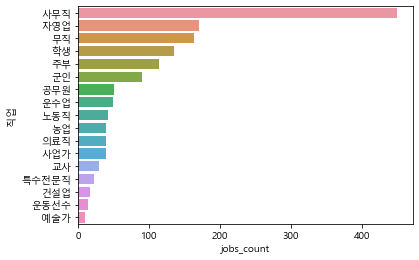

In [83]:
jobs = data[['환자ID', '성별', '직업' , '비만여부', '지방축적도', '입원기간' , '고혈압여부' ,'당뇨여부', '과거수술횟수', '수술실패여부', '재발여부']]

# 사무직 자영업 무직 순으로 많다 

jobs_count = jobs.groupby(['직업'], as_index=False).agg(jobs_count = ('환자ID', 'count'))
jobs_count2 = jobs_count.sort_values(by = 'jobs_count', ascending=False )
sns.barplot(data = jobs_count2, x = 'jobs_count', y = '직업' )

<AxesSubplot:xlabel='비만여부', ylabel='count'>

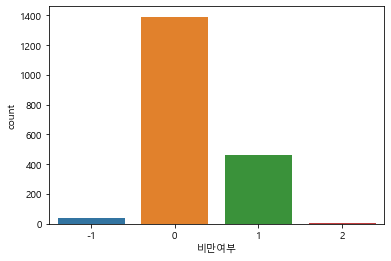

In [84]:
sns.countplot(data = data , x = '비만여부' ) # 전체 수술환자 비만정도

<AxesSubplot:xlabel='재발여부', ylabel='count'>

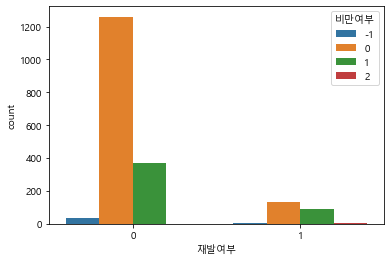

In [85]:
sns.countplot(data = data.sort_values(by = '비만여부'), x='재발여부', hue = '비만여부') # 비만정도에 따른 재발여부

수술환자 대부분은 정상이었고 재수술환자도 대부분 정상이었다.

<AxesSubplot:xlabel='지방축적도_1', ylabel='count'>

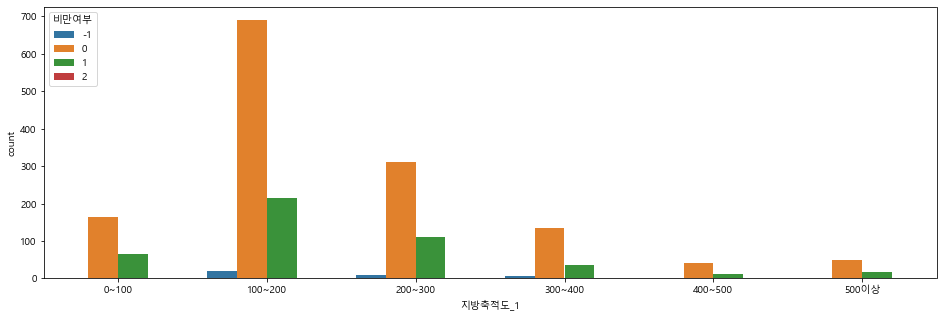

In [86]:
def Total_1(data):    
    if data < 100:        
        return '0~100'
    elif data < 200:
        return '100~200'
    elif data < 300:
        return '200~300'
    elif data < 400:
        return '300~400'
    elif data < 500:
        return '400~500'
    else:
        return '500이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (16, 5))  # 피규어 사이즈 확장 
data['지방축적도_1'] = data['지방축적도'].apply(Total_1)
sns.countplot(data = data.sort_values(by = '비만여부'), x='지방축적도_1', hue = '비만여부', order=['0~100','100~200','200~300','300~400','400~500','500이상'])

지방축적도랑 비만여부는 상관관계가 없다.

In [87]:
data['재발여부']

0       0
1       0
2       0
3       0
4       0
       ..
1889    0
1890    0
1891    0
1892    0
1893    0
Name: 재발여부, Length: 1894, dtype: int64

<AxesSubplot:xlabel='재발여부', ylabel='count'>

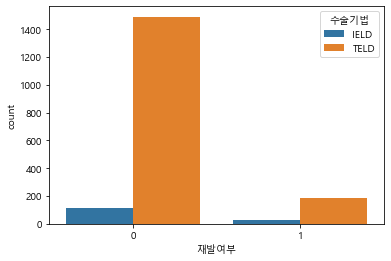

In [88]:
sns.countplot(data = data.sort_values(by = '수술기법'), x='재발여부', hue = '수술기법') # 크게차이 안남

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


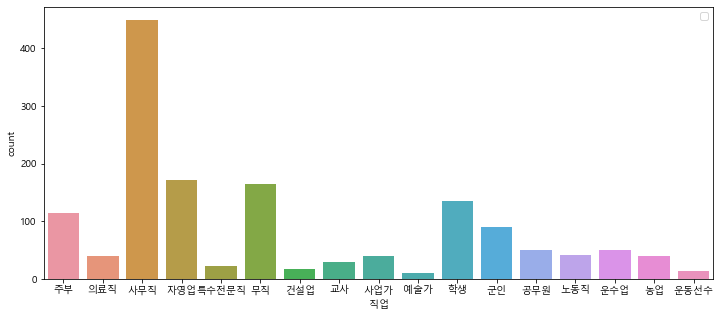

In [89]:
plt.figure(figsize=(12, 5)) # 그래프 크기 확대
sns.countplot(data = data.sort_values(by = '환자ID'), x='직업') # 수술환자의 직업 분류
plt.legend(loc = 'upper right') # 범례 우측상단표기

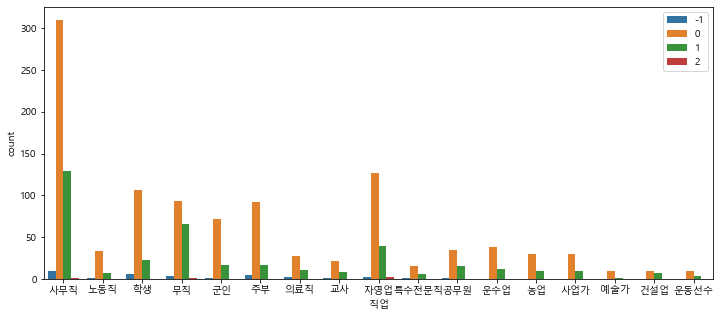

In [90]:
plt.figure(figsize=(12, 5)) # 그래프 크기 확대 
sns.countplot(data = data.sort_values(by = '비만여부'), x='직업', hue = '비만여부') 
plt.legend(loc = 'upper right') # 범례 우측상단표기 

In [91]:
data_1 = data.groupby(['재발여부','체중'], as_index = False).agg(count = ('체중', 'count'))
data_1

,재발여부,체중,count
0,0,35.0,2
1,0,38.0,1
2,0,43.0,2
3,0,44.0,4
4,0,45.0,8
...,...,...,...
373,1,103.0,1
374,1,104.0,2
375,1,106.0,1
376,1,110.0,2


<AxesSubplot:xlabel='체중', ylabel='count'>

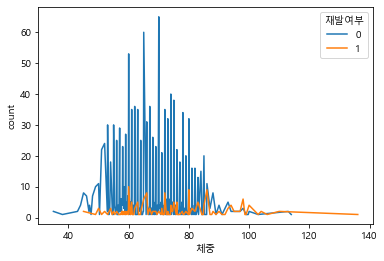

In [92]:
sns.lineplot(data = data_1, x='체중', y= 'count', hue = '재발여부')

체중 70 부터는 재발율이 높아진다

In [93]:
data_1 = data.groupby(['재발여부','신장'], as_index = False).agg(count = ('신장', 'count'))

<AxesSubplot:xlabel='신장', ylabel='count'>

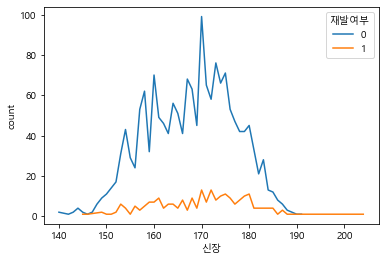

In [94]:
sns.lineplot(data = data_1, x='신장', y= 'count', hue = '재발여부')


신장 170이상부터 재발율이 높아진다

In [95]:
data_3 = data[data['직업'] == '사무직']
data_3.describe()

,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,...,헤모글로빈수치,혈전합병증여부,환자통증정도,흡연여부,통증기간(월),수술시간,수술실패여부,수술일자,재발여부,비만여부
count,449.000000,449.000000,448.000000,449.000000,449.000000,449.000000,447.000000,447.000000,449.000000,449.000000,...,449.000000,449.000000,449.000000,449.000000,448.000000,438.000000,449.000000,4.490000e+02,449.000000,449.000000
mean,11.360290,8.484744,248.583638,0.033408,2148.423229,0.195991,45.574497,16.577852,15.271804,0.031180,...,14.776526,0.002227,6.712695,0.256125,5.663728,61.543379,0.055679,2.015853e+07,0.135857,0.271715
std,2.897193,4.891643,435.952080,0.179899,477.134032,0.591519,9.699481,8.352402,11.278941,0.173999,...,1.550824,0.047193,2.264801,0.436978,14.192309,27.144864,0.229557,3.718350e+04,0.343019,0.492920
min,1.500000,1.000000,53.100000,0.000000,1021.000000,0.000000,11.900000,-6.300000,-3.400000,0.000000,...,9.700000,0.000000,1.000000,0.000000,0.100000,5.000000,0.000000,2.009033e+07,0.000000,-1.000000
25%,9.600000,7.100000,119.340000,0.000000,1801.000000,0.000000,38.900000,10.750000,8.200000,0.000000,...,13.710000,0.000000,7.000000,0.000000,1.000000,41.250000,0.000000,2.012093e+07,0.000000,0.000000
50%,11.150000,8.500000,163.380000,0.000000,2098.390000,0.000000,44.700000,16.000000,14.000000,0.000000,...,14.800000,0.000000,7.000000,0.000000,2.000000,60.000000,0.000000,2.017031e+07,0.000000,0.000000
75%,13.300000,9.600000,250.025000,0.000000,2423.100000,0.000000,51.200000,21.600000,21.100000,0.000000,...,15.900000,0.000000,8.000000,1.000000,4.000000,76.000000,0.000000,2.019071e+07,0.000000,1.000000
max,22.500000,101.000000,6089.430000,1.000000,4292.000000,3.000000,76.200000,45.500000,165.000000,1.000000,...,19.280000,1.000000,10.000000,1.000000,180.000000,220.000000,1.000000,2.020073e+07,1.000000,2.000000


In [96]:
data_4 = data.drop(index = data[data['직업'] == '사무직'].index)
data_4.describe()

,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,...,헤모글로빈수치,혈전합병증여부,환자통증정도,흡연여부,통증기간(월),수술시간,수술실패여부,수술일자,재발여부,비만여부
count,1445.000000,1445.000000,1443.000000,1445.000000,1445.000000,1445.000000,1443.000000,1443.000000,1444.000000,1445.000000,...,1444.000000,1445.000000,1445.000000,1445.000000,1442.000000,1402.000000,1445.000000,1.445000e+03,1445.000000,1445.000000
mean,11.389578,8.318782,239.332613,0.042907,2080.263308,0.262976,46.909356,16.253015,15.292950,0.064360,...,14.520374,0.002076,6.937716,0.204844,5.946983,62.229672,0.062284,2.016076e+07,0.114879,0.213841
std,2.839383,4.023137,448.174225,0.202717,470.486959,0.681202,25.449128,8.443958,10.150858,0.245478,...,1.546907,0.045533,2.011462,0.403728,18.088944,24.291856,0.241754,3.671459e+04,0.318986,0.462532
min,1.270000,1.000000,25.970000,0.000000,1016.800000,0.000000,14.000000,-10.600000,-27.400000,0.000000,...,7.000000,0.000000,1.000000,0.000000,0.000000,6.000000,0.000000,2.009012e+07,0.000000,-1.000000
25%,9.540000,7.060000,122.000000,0.000000,1744.200000,0.000000,38.600000,10.300000,9.100000,0.000000,...,13.400000,0.000000,7.000000,0.000000,1.000000,45.000000,0.000000,2.012112e+07,0.000000,0.000000
50%,11.300000,8.270000,170.200000,0.000000,2035.900000,0.000000,45.400000,15.600000,14.650000,0.000000,...,14.550000,0.000000,7.000000,0.000000,2.000000,60.000000,0.000000,2.019010e+07,0.000000,0.000000
75%,13.100000,9.500000,253.200000,0.000000,2356.300000,0.000000,52.100000,21.350000,21.100000,0.000000,...,15.600000,0.000000,8.000000,0.000000,4.000000,78.000000,0.000000,2.019062e+07,0.000000,0.000000
max,22.500000,101.000000,12113.470000,1.000000,5569.000000,3.000000,559.000000,48.700000,165.000000,1.000000,...,19.380000,1.000000,10.000000,1.000000,360.000000,190.000000,1.000000,2.020081e+07,1.000000,2.000000


<AxesSubplot:xlabel='입원기간', ylabel='직업'>

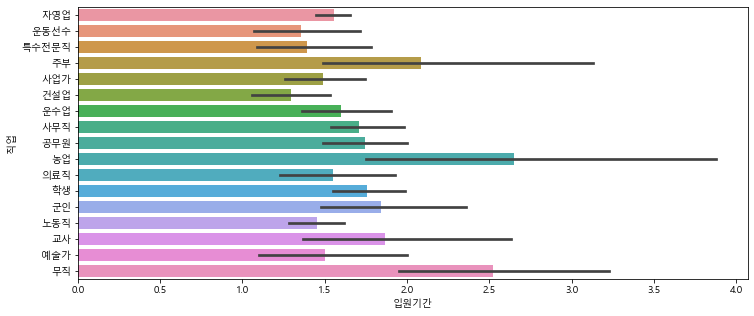

In [97]:
plt.figure(figsize = (12, 5))
sns.barplot(data = data, y = '직업', x = '입원기간')

<AxesSubplot:xlabel='비만여부', ylabel='직업'>

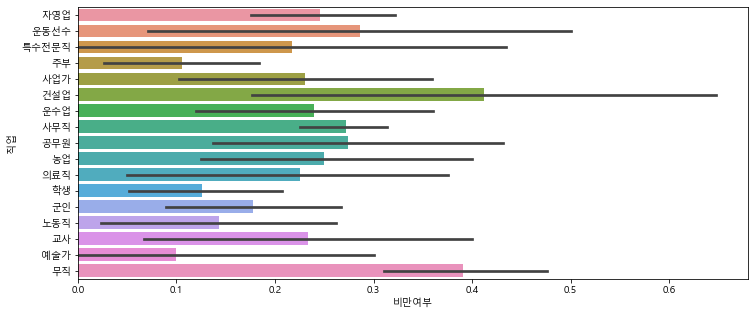

In [98]:
plt.figure(figsize = (12, 5))
sns.barplot(data = data, y = '직업', x = '비만여부')

<AxesSubplot:xlabel='과거수술횟수', ylabel='직업'>

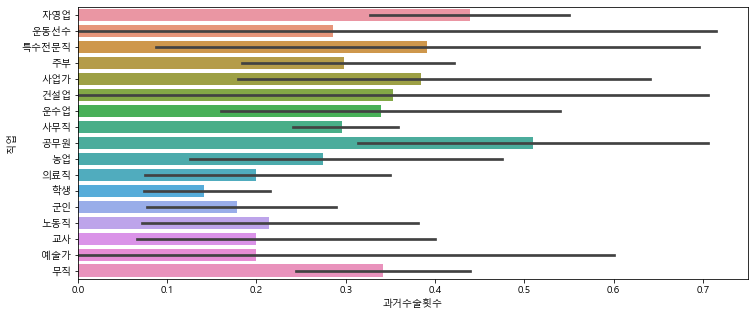

In [99]:
plt.figure(figsize = (12, 5))
sns.barplot(data = data, y = '직업', x = '과거수술횟수')

# 기타

In [100]:
data_2 = ['전방디스크높이(mm)','후방디스크높이(mm)','비만여부','지방축적도','연령','체중','신장']
data_3 = data[data_2].fillna(method='backfill')
data_3

,전방디스크높이(mm),후방디스크높이(mm),비만여부,지방축적도,연령,체중,신장
0,16.1,12.3,0,282.3,66,60.3,163
1,13.7,6.4,0,177.3,47,71.7,171
2,13.6,7.4,0,256.8,39,77.1,178
3,10.6,7.3,0,250.1,40,74.2,174
4,17.1,8.1,0,232.2,42,80.7,183
...,...,...,...,...,...,...,...
1889,17.0,10.7,1,237.5,59,64.0,157
1890,9.4,8.2,0,288.0,42,59.0,157
1891,13.5,5.5,1,148.5,61,70.0,167
1892,14.0,10.0,0,89.0,29,77.0,177


# 모델링

## decisiontree

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = data_3
Y = data['재발여부'].ravel()

X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size = 0.3, random_state = 0)

model = DecisionTreeClassifier(max_depth = 1 )
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=1)

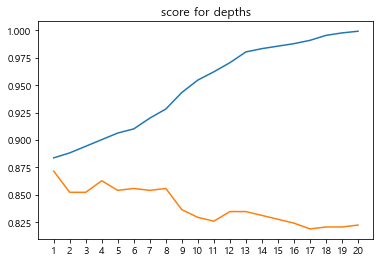

In [102]:
# depth에 따른 정확도
train_score=[]
test_score=[]
for i in range(1,21):
    
    model=DecisionTreeClassifier(max_depth=i,random_state=4)
    model.fit(X_train,Y_train)
    train_score.append(model.score(X_train,Y_train))
    test_score.append(model.score(X_test,Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [103]:
model_1=DecisionTreeClassifier(max_depth=1,random_state=4)
model_1.fit(X_train, Y_train)
train_accuracy = model_1.score(X_train, Y_train)
test_accuracy = model_1.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

훈련 정확도 : 0.8837735849056604
테스트 정확도 : 0.8717047451669596


In [104]:
import matplotlib.pyplot as plt
import numpy as np

importance = model.feature_importances_
importance

array([0.22427564, 0.18909937, 0.01414848, 0.21353339, 0.12167197,
       0.16359858, 0.07367257])

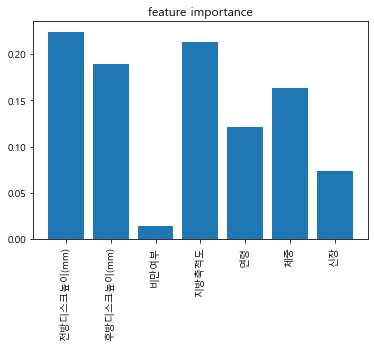

In [105]:
plt.figure()
plt.title('feature importance')
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X.columns, rotation = 90)
plt.show()

## GradientBoosting

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X = data_3
Y = data['재발여부'].ravel()

X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size = 0.3, random_state = 0)

model = GradientBoostingClassifier(max_depth = 1 )
model.fit(X_train, Y_train)

GradientBoostingClassifier(max_depth=1)

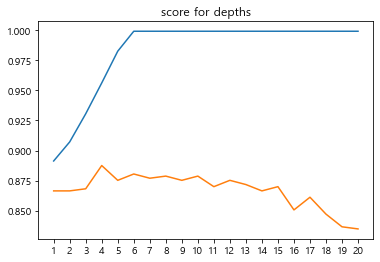

In [107]:
train_score=[]
test_score=[]
for i in range(1,21):
    
    model=GradientBoostingClassifier(max_depth=i,random_state=4)
    model.fit(X_train,Y_train)
    train_score.append(model.score(X_train,Y_train))
    test_score.append(model.score(X_test,Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [108]:
model_1=GradientBoostingClassifier(max_depth=4,random_state=4)
model_1.fit(X_train, Y_train)
train_accuracy = model_1.score(X_train, Y_train)
test_accuracy = model_1.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

훈련 정확도 : 0.9562264150943396
테스트 정확도 : 0.8875219683655536


In [109]:
import matplotlib.pyplot as plt
import numpy as np

importance = model.feature_importances_
importance

array([0.20998112, 0.19507439, 0.0101609 , 0.21247607, 0.12655726,
       0.16426253, 0.08148772])

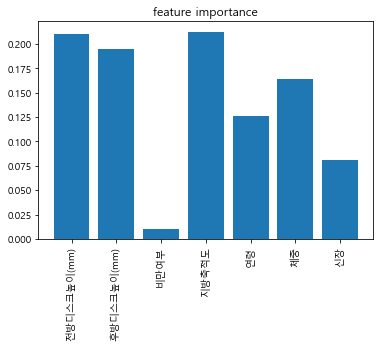

In [110]:
plt.figure()
plt.title('feature importance')
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X.columns, rotation = 90)
plt.show()

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state = 0)

## RandomForest

In [112]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth = 10, random_state = 0)
clf_rf.fit(x_train_std, y_train)
pred_rf =clf_rf.predict(x_test_std)

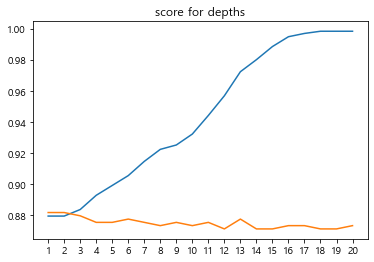

In [113]:
train_score=[]
test_score=[]
for i in range(1,21):
    model=RandomForestClassifier(max_depth=i,random_state=4)
    model.fit(x_train,y_train)
    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [114]:
model_3=RandomForestClassifier(max_depth=3,random_state=4)
model_3.fit(x_train,y_train)
train_accuracy_3 = model_3.score(x_train, y_train)
test_accuracy_3 = model_3.score(x_test, y_test)
print(f'훈련 정확도는 : {train_accuracy_3}, 테스트 정확도는 {test_accuracy_3} 입니다.')

훈련 정확도는 : 0.8838028169014085, 테스트 정확도는 0.879746835443038 입니다.


In [115]:
data_4 = ['재발여부','전방디스크높이(mm)','후방디스크높이(mm)','비만여부','지방축적도','연령','체중','신장']
data_5 = data[data_4].fillna(method='backfill')
data_5

,재발여부,전방디스크높이(mm),후방디스크높이(mm),비만여부,지방축적도,연령,체중,신장
0,0,16.1,12.3,0,282.3,66,60.3,163
1,0,13.7,6.4,0,177.3,47,71.7,171
2,0,13.6,7.4,0,256.8,39,77.1,178
3,0,10.6,7.3,0,250.1,40,74.2,174
4,0,17.1,8.1,0,232.2,42,80.7,183
...,...,...,...,...,...,...,...,...
1889,0,17.0,10.7,1,237.5,59,64.0,157
1890,0,9.4,8.2,0,288.0,42,59.0,157
1891,0,13.5,5.5,1,148.5,61,70.0,167
1892,0,14.0,10.0,0,89.0,29,77.0,177


## kmeans

In [116]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# 스케일 변환
scaler = MinMaxScaler()
data_5_std = scaler.fit_transform(data_5)

# 군집
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data_5_std)

# 생성 된 클러스터를 데이터 프레임에 넣습니다.
clusters = kmeans.labels_
data_5.copy().loc[:, 'cluster'] = clusters

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #2차원으로 변환하라는 코딩
pca.fit(data_5_std)


PCA(n_components=2)

In [118]:
pca_df = pd.DataFrame(pca.transform(data_5_std), columns = ['X','Y'])
pca_df.loc[:,'cluster'] = clusters
pca_df.head(1)

,X,Y,cluster
0,-0.118938,0.372937,0


<AxesSubplot:xlabel='X', ylabel='Y'>

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


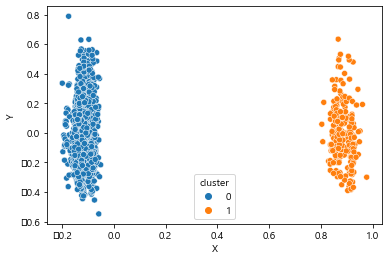

In [119]:
import seaborn as sns
sns.scatterplot(data = pca_df, x = 'X', y = 'Y', hue = 'cluster')

## 직업

In [120]:
data_6 = ['전방디스크높이(mm)','후방디스크높이(mm)','비만여부','지방축적도','연령','체중','신장','직업']
data_7 = data[data_6].fillna(0)
data_7 = pd.get_dummies(data_7)
data_7


,전방디스크높이(mm),후방디스크높이(mm),비만여부,지방축적도,연령,체중,신장,직업_0,직업_건설업,직업_공무원,...,직업_사무직,직업_사업가,직업_예술가,직업_운동선수,직업_운수업,직업_의료직,직업_자영업,직업_주부,직업_특수전문직,직업_학생
0,16.1,12.3,0,282.3,66,60.3,163,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,13.7,6.4,0,177.3,47,71.7,171,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,13.6,7.4,0,256.8,39,77.1,178,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10.6,7.3,0,250.1,40,74.2,174,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,17.1,8.1,0,232.2,42,80.7,183,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,17.0,10.7,1,237.5,59,64.0,157,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1890,9.4,8.2,0,288.0,42,59.0,157,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1891,13.5,5.5,1,148.5,61,70.0,167,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1892,14.0,10.0,0,89.0,29,77.0,177,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = data_7
Y = data['재발여부'].ravel()

X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size = 0.3, random_state = 0)

model = DecisionTreeClassifier(max_depth = 1 )
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=1)

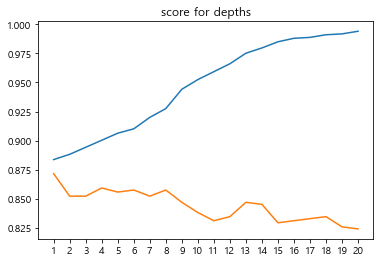

In [122]:
# depth에 따른 정확도
train_score=[]
test_score=[]
for i in range(1,21):
    
    model=DecisionTreeClassifier(max_depth=i,random_state=4)
    model.fit(X_train,Y_train)
    train_score.append(model.score(X_train,Y_train))
    test_score.append(model.score(X_test,Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [123]:
model_1=DecisionTreeClassifier(max_depth=1,random_state=4)
model_1.fit(X_train, Y_train)
train_accuracy = model_1.score(X_train, Y_train)
test_accuracy = model_1.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

훈련 정확도 : 0.8837735849056604
테스트 정확도 : 0.8717047451669596


In [124]:
data_6 = ['전방디스크높이(mm)','후방디스크높이(mm)','비만여부','지방축적도','연령','체중','신장','직업']
data_7 = data[data_6].fillna(0)
data_7 = pd.get_dummies(data_7)
data_7

,전방디스크높이(mm),후방디스크높이(mm),비만여부,지방축적도,연령,체중,신장,직업_0,직업_건설업,직업_공무원,...,직업_사무직,직업_사업가,직업_예술가,직업_운동선수,직업_운수업,직업_의료직,직업_자영업,직업_주부,직업_특수전문직,직업_학생
0,16.1,12.3,0,282.3,66,60.3,163,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,13.7,6.4,0,177.3,47,71.7,171,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,13.6,7.4,0,256.8,39,77.1,178,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10.6,7.3,0,250.1,40,74.2,174,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,17.1,8.1,0,232.2,42,80.7,183,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,17.0,10.7,1,237.5,59,64.0,157,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1890,9.4,8.2,0,288.0,42,59.0,157,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1891,13.5,5.5,1,148.5,61,70.0,167,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1892,14.0,10.0,0,89.0,29,77.0,177,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [125]:
importance = model.feature_importances_
importance

array([0.20291064, 0.19349705, 0.00640143, 0.16528972, 0.14532853,
       0.15946288, 0.03969224, 0.01179079, 0.00666533, 0.        ,
       0.        , 0.01376502, 0.00403072, 0.00118899, 0.0025548 ,
       0.00817162, 0.        , 0.        , 0.        , 0.01193688,
       0.        , 0.00162132, 0.01208775, 0.01360431, 0.        ])

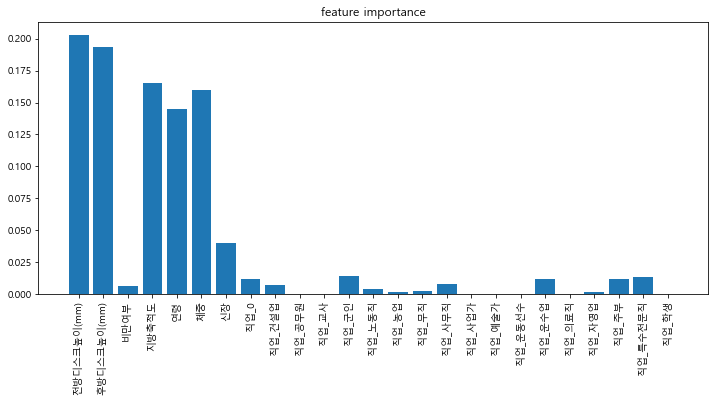

In [126]:
plt.figure(figsize=(12, 5))
plt.title('feature importance')
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X.columns, rotation = 90)
plt.show()


In [127]:
df0 = data[data['재발여부'] == 0]
df_0 = df0.groupby(['재발여부','연령'], as_index = False).agg(정상 = ('재발여부', 'count'))
df1 = data[data['재발여부'] == 1]
df_1 = df1.groupby(['재발여부','연령'], as_index = False).agg(재발 = ('재발여부', 'count'))
df = df_0.merge(df_1, on='연령', how='outer' )
df[['재발여부_x','정상','재발']] = df[['재발여부_x','정상','재발']].fillna(0)
df['재발여부_y'] = df['재발여부_y'].fillna(1)
df['total'] = df['정상']+df['재발']
df['A_percent'] = round(df['정상'] / df['total'] * 100, 1)
df['B_percent'] = round(100 - df['A_percent'], 1)
df


,재발여부_x,연령,정상,재발여부_y,재발,total,A_percent,B_percent
0,0.0,15,1.0,1.0,0.0,1.0,100.0,0.0
1,0.0,16,5.0,1.0,0.0,5.0,100.0,0.0
2,0.0,17,12.0,1.0,1.0,13.0,92.3,7.7
3,0.0,18,18.0,1.0,2.0,20.0,90.0,10.0
4,0.0,19,29.0,1.0,0.0,29.0,100.0,0.0
...,...,...,...,...,...,...,...,...
63,0.0,79,5.0,1.0,2.0,7.0,71.4,28.6
64,0.0,80,1.0,1.0,0.0,1.0,100.0,0.0
65,0.0,84,2.0,1.0,0.0,2.0,100.0,0.0
66,0.0,86,1.0,1.0,0.0,1.0,100.0,0.0


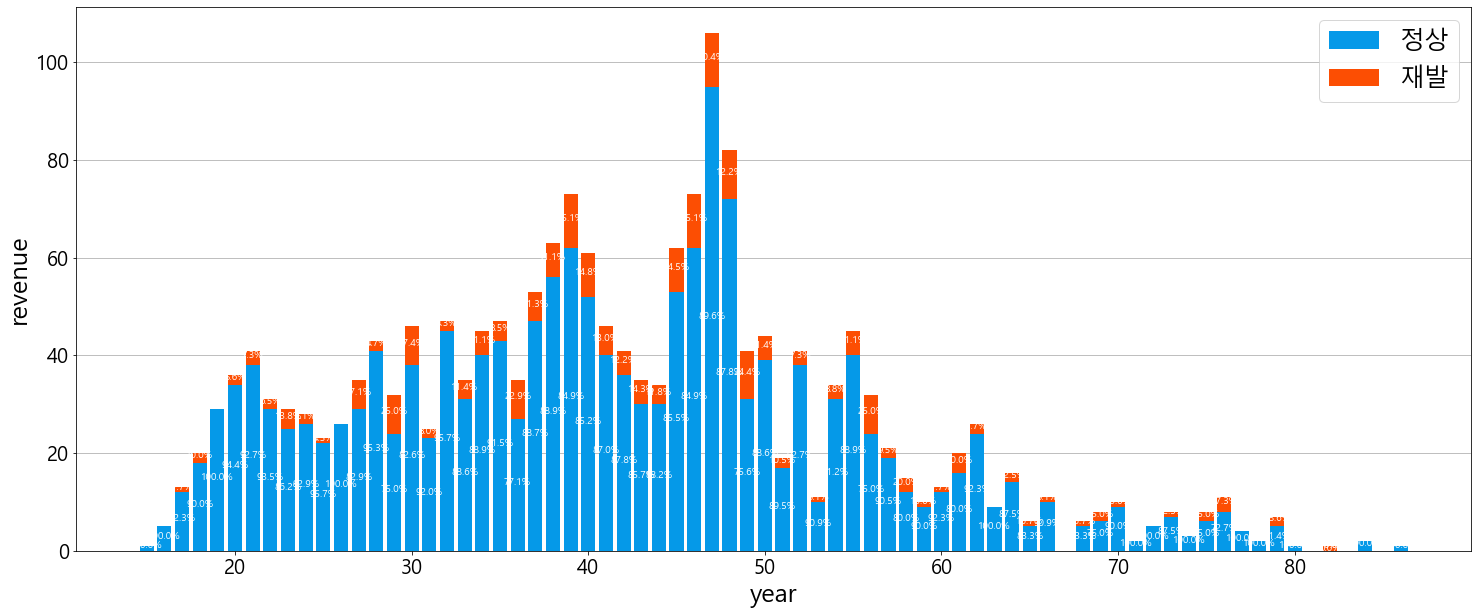

In [128]:
fig, ax = plt.subplots()
# 피규어 크기
fig.set_size_inches(25, 10)
# 그래프 뒤에 그리드 그리기
ax.set_axisbelow(True)
# y 축만 그리드 그리기
ax.grid(True, axis='y')
# bar 그리기
ax.bar(df['연령'], df['정상'], label = '정상', color = '#0599e8')
ax.bar(df['연령'], df['재발'], bottom = df['정상'], label = '재발', color = '#fc4e03')
# 라벨 설정
ax.set_xlabel('year', fontsize = 25)
ax.set_ylabel('revenue', fontsize = 25)
# tick 설정
ax.tick_params(axis = 'x', labelsize = 20)
ax.tick_params(axis = 'y', labelsize = 20)
# 범례 표시
ax.legend(fontsize = 25, loc = 'upper right')

# 텍스트 지정
for i in range(len(df['연령'])):
    ax.text(df['연령'][i], df['정상'][i] / 2, str(df['A_percent'][i]) + '%', fontsize = 10, horizontalalignment='center', color = 'w')
    ax.text(df['연령'][i], (df['정상'][i] + df['정상'][i] + df['재발'][i])/ 2, str(df['B_percent'][i]) + '%', fontsize = 10, horizontalalignment='center', color = 'w')

<AxesSubplot:xlabel='연령대', ylabel='count'>

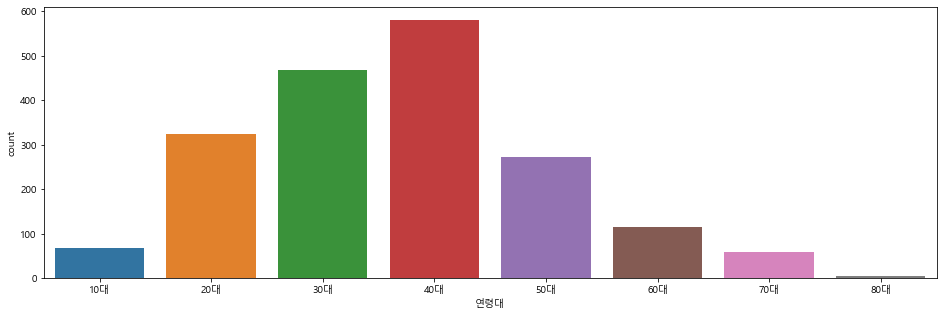

In [129]:

def Total_1(data):    
    if data < 20:        
        return '10대'
    elif data < 30:
        return '20대'
    elif data < 40:
        return '30대'
    elif data < 50:
        return '40대'
    elif data < 60:
        return '50대'
    elif data < 70:
        return '60대'
    elif data < 80:
        return '70대'
    else:
        return '80대'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (16, 5))  # 피규어 사이즈 확장 
data['연령대'] = data['연령'].apply(Total_1)
sns.countplot(data = data.sort_values(by = '연령대'), x='연령대', order=['10대','20대','30대','40대','50대','60대','70대','80대'])

<AxesSubplot:xlabel='연령', ylabel='count'>

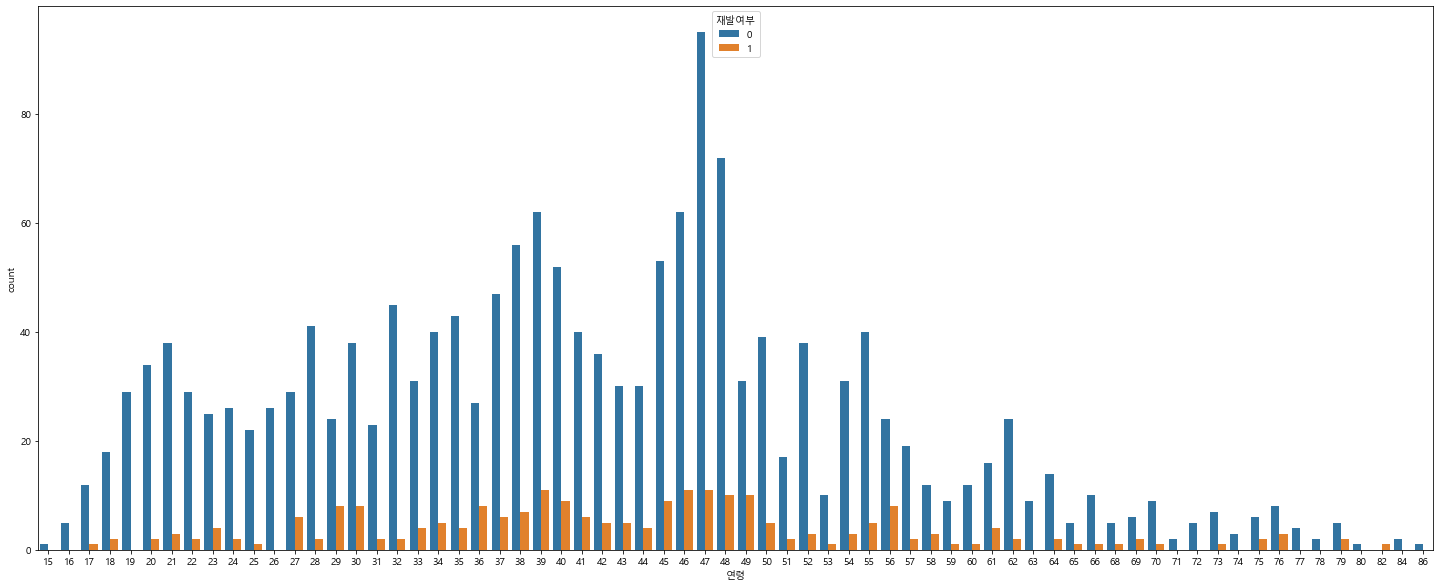

In [130]:
plt.figure(figsize = (25,10))
sns.countplot(data = data , x = '연령', hue = '재발여부') # 전체 수술환자 비만정도


<AxesSubplot:xlabel='비만여부', ylabel='count'>

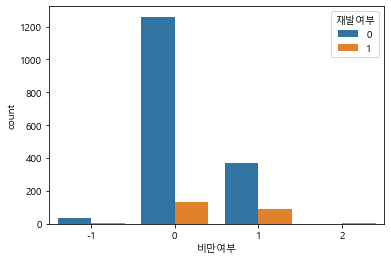

In [131]:
sns.countplot(data = data , x = '비만여부', hue = '재발여부') # 전체 수술환자 비만정도

<AxesSubplot:xlabel='직업', ylabel='count'>

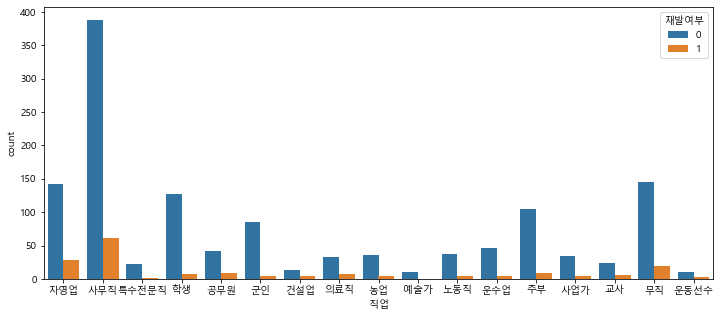

In [132]:
plt.figure(figsize=(12, 5))
sns.countplot(data = data.sort_values(by = '재발여부'), x='직업', hue = '재발여부') # 비만정도에 따른 재발여부

In [133]:
data_11 = data.drop(['혈액형','환자ID','수술일자','입원일자','퇴원일자','ODI','골밀도','연령대','지방축적도_1','재발여부'], axis = 1)
data_11 = pd.get_dummies(data_11)
data_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   전방디스크높이(mm)             1894 non-null   float64
 1   후방디스크높이(mm)             1894 non-null   float64
 2   지방축적도                   1891 non-null   float64
 3   Instability             1894 non-null   int64  
 4   MF + ES                 1894 non-null   float64
 5   Modic change            1894 non-null   int64  
 6   PI                      1890 non-null   float64
 7   PT                      1890 non-null   float64
 8   Seg Angle(raw)          1893 non-null   float64
 9   Vaccum disc             1894 non-null   int64  
 10  디스크단면적                  1893 non-null   float64
 11  디스크위치                   1894 non-null   int64  
 12  척추전방위증                  1894 non-null   int64  
 13  Large Lymphocyte        1894 non-null   float64
 14  Location of herniation  1894 non-null   

In [134]:
data_11.value_counts

<bound method DataFrame.value_counts of       전방디스크높이(mm)  후방디스크높이(mm)  지방축적도  Instability  MF + ES  Modic change  \
0            16.1         12.3  282.3            0   1824.6             3   
1            13.7          6.4  177.3            0   1737.5             0   
2            13.6          7.4  256.8            0   1188.5             0   
3            10.6          7.3  250.1            0   2534.5             0   
4            17.1          8.1  232.2            0   1840.6             0   
...           ...          ...    ...          ...      ...           ...   
1889         17.0         10.7  237.5            0   2795.7             2   
1890          9.4          8.2  288.0            0   1473.0             0   
1891         13.5          5.5  148.5            0   3864.1             0   
1892         14.0         10.0   89.0            0   2481.8             2   
1893         16.1          9.5  251.4            0   1796.1             0   

        PI    PT  Seg Angle(raw)  V

In [135]:
data_12 = data_11.fillna(data_11.median())

In [136]:
data_12

,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,...,직업_예술가,직업_운동선수,직업_운수업,직업_의료직,직업_자영업,직업_주부,직업_특수전문직,직업_학생,수술기법_IELD,수술기법_TELD
0,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,0,...,0,0,0,0,1,0,0,0,0,1
1,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,0,...,0,1,0,0,0,0,0,0,0,1
2,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,0,...,0,0,0,0,0,0,1,0,0,1
3,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,0,...,0,0,0,0,0,1,0,0,0,1
4,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,17.0,10.7,237.5,0,2795.7,2,59.5,23.0,21.8,0,...,0,0,0,0,0,0,0,0,0,0
1890,9.4,8.2,288.0,0,1473.0,0,47.7,20.2,5.0,0,...,0,0,0,0,0,0,0,0,0,0
1891,13.5,5.5,148.5,0,3864.1,0,44.6,15.0,17.4,1,...,0,0,0,0,0,0,0,0,1,0
1892,14.0,10.0,89.0,0,2481.8,2,32.2,11.1,17.7,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
data_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   전방디스크높이(mm)             1894 non-null   float64
 1   후방디스크높이(mm)             1894 non-null   float64
 2   지방축적도                   1894 non-null   float64
 3   Instability             1894 non-null   int64  
 4   MF + ES                 1894 non-null   float64
 5   Modic change            1894 non-null   int64  
 6   PI                      1894 non-null   float64
 7   PT                      1894 non-null   float64
 8   Seg Angle(raw)          1894 non-null   float64
 9   Vaccum disc             1894 non-null   int64  
 10  디스크단면적                  1894 non-null   float64
 11  디스크위치                   1894 non-null   int64  
 12  척추전방위증                  1894 non-null   int64  
 13  Large Lymphocyte        1894 non-null   float64
 14  Location of herniation  1894 non-null   

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler
X = data_12
Y = data['재발여부'].ravel()

X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size = 0.3, random_state = 0)

model = DecisionTreeClassifier(max_depth = 1 )
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=1)

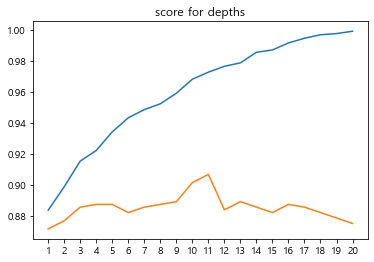

In [139]:
# depth에 따른 정확도
train_score=[]
test_score=[]
for i in range(1,21):
    
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,Y_train)
    train_score.append(model.score(X_train,Y_train))
    test_score.append(model.score(X_test,Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [140]:
model_1=DecisionTreeClassifier(max_depth=5)
model_1.fit(X_train, Y_train)
train_accuracy = model_1.score(X_train, Y_train)
test_accuracy = model_1.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

훈련 정확도 : 0.9343396226415094
테스트 정확도 : 0.8875219683655536


In [141]:
importance = model_1.feature_importances_
importance

array([0.01505388, 0.06803619, 0.02804252, 0.        , 0.        ,
       0.        , 0.04622394, 0.        , 0.        , 0.        ,
       0.06400252, 0.        , 0.01144593, 0.01547174, 0.02336877,
       0.        , 0.        , 0.        , 0.        , 0.09616234,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02390994, 0.        ,
       0.02983311, 0.        , 0.2171416 , 0.        , 0.        ,
       0.        , 0.3303863 , 0.03092121, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

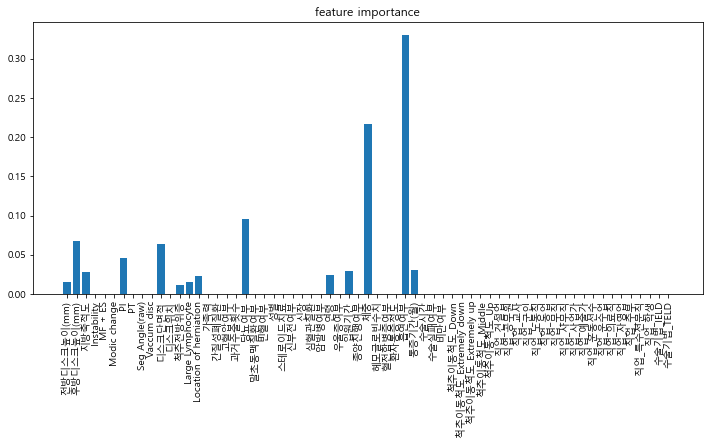

In [142]:
plt.figure(figsize=(12, 5))
plt.title('feature importance')
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X.columns, rotation = 90)
plt.show()

흡연여부,체중,당뇨여부

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler
model = GradientBoostingClassifier(max_depth = 5 )
model.fit(X_train, Y_train)


GradientBoostingClassifier(max_depth=5)

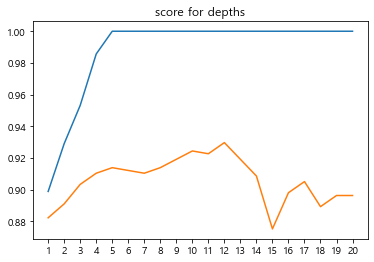

In [144]:
# depth에 따른 정확도
train_score=[]
test_score=[]
for i in range(1,21):
    
    model=GradientBoostingClassifier(max_depth=i)
    model.fit(X_train,Y_train)
    train_score.append(model.score(X_train,Y_train))
    test_score.append(model.score(X_test,Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [145]:
model_1=GradientBoostingClassifier(max_depth=5)
model_1.fit(X_train, Y_train)
train_accuracy = model_1.score(X_train, Y_train)
test_accuracy = model_1.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

훈련 정확도 : 1.0
테스트 정확도 : 0.9103690685413005


In [146]:
importance = model_1.feature_importances_
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)}) # 소수3째자리까지 표기
importance

array([0.038, 0.050, 0.039, 0.003, 0.040, 0.003, 0.042, 0.035, 0.033,
       0.002, 0.129, 0.005, 0.000, 0.054, 0.017, 0.001, 0.005, 0.002,
       0.004, 0.048, 0.001, 0.003, 0.001, 0.001, 0.000, 0.007, 0.000,
       0.000, 0.028, 0.001, 0.010, 0.000, 0.128, 0.020, 0.000, 0.012,
       0.143, 0.014, 0.018, 0.000, 0.008, 0.001, 0.000, 0.000, 0.001,
       0.002, 0.001, 0.001, 0.000, 0.000, 0.000, 0.001, 0.000, 0.004,
       0.000, 0.000, 0.002, 0.000, 0.004, 0.001, 0.005, 0.000, 0.000,
       0.018, 0.011])

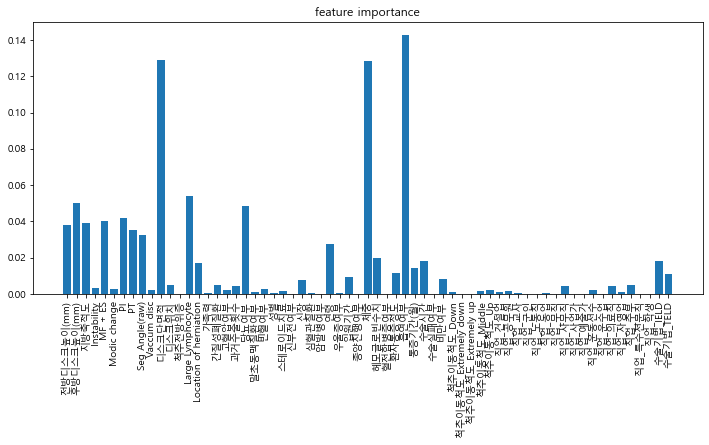

In [147]:
plt.figure(figsize=(12, 5))
plt.title('feature importance')
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X.columns, rotation = 90)
plt.show()

흡연여부,체중,디스크면적,당뇨여부

In [148]:

model = RandomForestClassifier(max_depth = 5 )
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5)

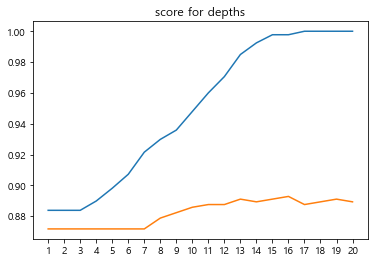

In [149]:
# depth에 따른 정확도
train_score=[]
test_score=[]
for i in range(1,21):
    
    model=RandomForestClassifier(max_depth=i,random_state=20)
    model.fit(X_train,Y_train)
    train_score.append(model.score(X_train,Y_train))
    test_score.append(model.score(X_test,Y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [150]:
model_1=RandomForestClassifier(max_depth=5,random_state=20)
model_1.fit(X_train, Y_train)
train_accuracy = model_1.score(X_train, Y_train)
test_accuracy = model_1.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

훈련 정확도 : 0.8981132075471698
테스트 정확도 : 0.8717047451669596


In [151]:
importance = model_1.feature_importances_
importance

array([0.041, 0.038, 0.036, 0.002, 0.053, 0.002, 0.034, 0.029, 0.028,
       0.002, 0.067, 0.007, 0.000, 0.031, 0.010, 0.003, 0.001, 0.005,
       0.010, 0.071, 0.005, 0.000, 0.002, 0.003, 0.002, 0.045, 0.002,
       0.002, 0.023, 0.002, 0.019, 0.000, 0.156, 0.032, 0.002, 0.013,
       0.071, 0.023, 0.023, 0.001, 0.031, 0.004, 0.001, 0.000, 0.005,
       0.005, 0.003, 0.003, 0.001, 0.002, 0.000, 0.001, 0.001, 0.005,
       0.000, 0.000, 0.002, 0.000, 0.008, 0.002, 0.001, 0.000, 0.003,
       0.010, 0.011])

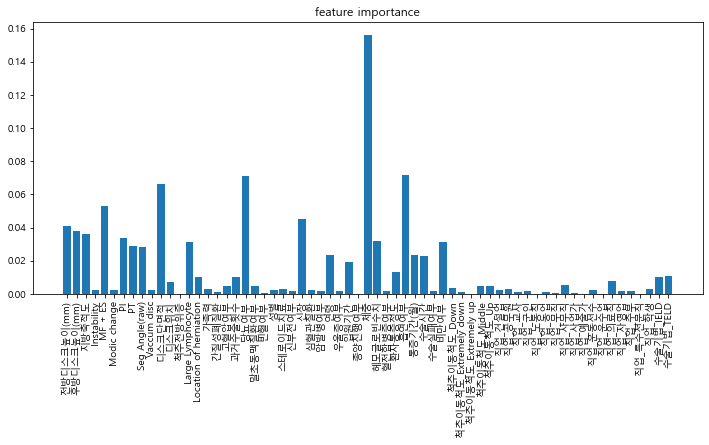

In [152]:
plt.figure(figsize=(12, 5))
plt.title('feature importance')
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X.columns, rotation = 90)
plt.show()

# EDA

<AxesSubplot:xlabel='수술기법', ylabel='count'>

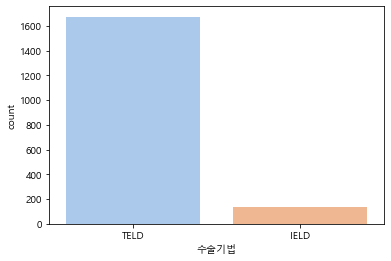

In [153]:
#수술기법

sns.set_palette('pastel')
sns.countplot(data = data , x = '수술기법' ) # 전체 수술환자 

<AxesSubplot:xlabel='수술기법', ylabel='count'>

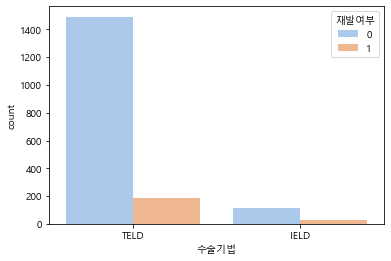

In [154]:

sns.set_palette('pastel')
sns.countplot(data = data.sort_values(by = '재발여부'), x='수술기법', hue = '재발여부') # 재발여부

<AxesSubplot:xlabel='체중범위', ylabel='count'>

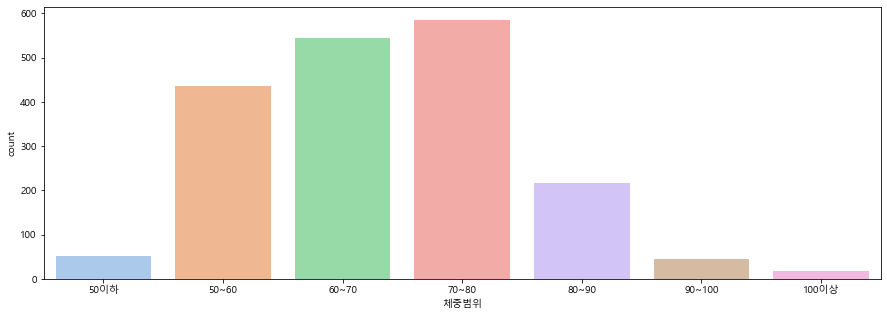

In [155]:
 # min 35, max 136.1
def Total_1(data):    
    if  data < 50:
        return '50이하'
    elif data < 60:
        return '50~60'
    elif data < 70:
        return '60~70'
    elif data < 80:
        return '70~80'
    elif data < 90:
        return '80~90'
    elif data < 100:
        return '90~100'
    else:
        return '100이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (15, 5))  # 피규어 사이즈 확장 
sns.set_palette('pastel')
data['체중범위'] = data['체중'].apply(Total_1)
sns.countplot(data = data.sort_values(by = '재발여부'), x='체중범위', 
              order=['50이하','50~60','60~70','70~80','80~90',
                     '90~100','100이상'])

<AxesSubplot:xlabel='체중범위', ylabel='count'>

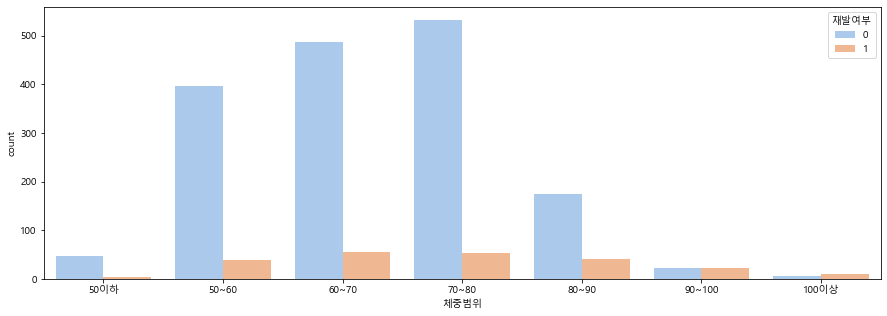

In [156]:
 # min 35, max 136.1
def Total_1(data):    
    if data < 50:
        return '50이하'
    elif data < 60:
        return '50~60'
    elif data < 70:
        return '60~70'
    elif data < 80:
        return '70~80'
    elif data < 90:
        return '80~90'
    elif data < 100:
        return '90~100'
    else:
        return '100이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (15, 5))  # 피규어 사이즈 확장 
sns.set_palette('pastel')
data['체중범위'] = data['체중'].apply(Total_1)
sns.countplot(data = data.sort_values(by = '재발여부'), x='체중범위',hue = '재발여부',  
              order=['50이하','50~60','60~70','70~80','80~90',
                     '90~100','100이상'])

(array([20.000, 40.000, 60.000, 80.000, 100.000, 120.000, 140.000, 160.000]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

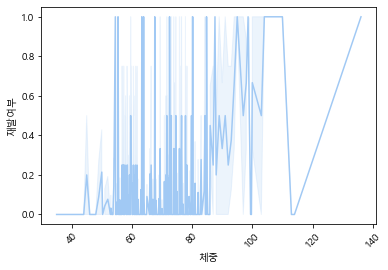

In [157]:
sns.lineplot(data=data, x= '체중', y = '재발여부')
plt.xticks(rotation=45)  # x라벨이 겹쳐서 글자 회전

<AxesSubplot:xlabel='디스크단면적범위', ylabel='count'>

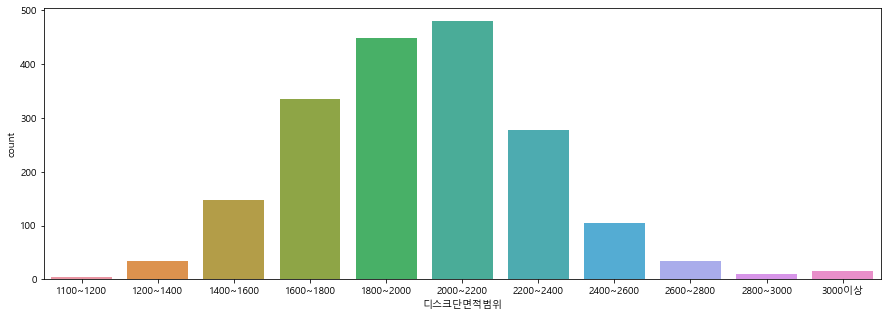

In [158]:

 # min 1145.8, max 3214.2
def Total_1(data):    
    if data < 1200:        
        return '1100~1200'
    elif data < 1400:
        return '1200~1400'
    elif data < 1600:
        return '1400~1600'
    elif data < 1800:
        return '1600~1800'
    elif data < 2000:
        return '1800~2000'
    elif data < 2200:
        return '2000~2200'
    elif data < 2400:
        return '2200~2400'
    elif data < 2600:
        return '2400~2600'
    elif data < 2800:
        return '2600~2800'
    elif data < 3000:
        return '2800~3000'
    else:
        return '3000이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (15, 5))  # 피규어 사이즈 확장 
sns.set_palette('pastel')
data['디스크단면적범위'] = data['디스크단면적'].apply(Total_1)
sns.countplot(data = data.sort_values(by = '재발여부'), x='디스크단면적범위', 
              order=['1100~1200','1200~1400','1400~1600','1600~1800','1800~2000','2000~2200',
                     '2200~2400','2400~2600','2600~2800','2800~3000','3000이상'])

<AxesSubplot:xlabel='디스크단면적범위', ylabel='count'>

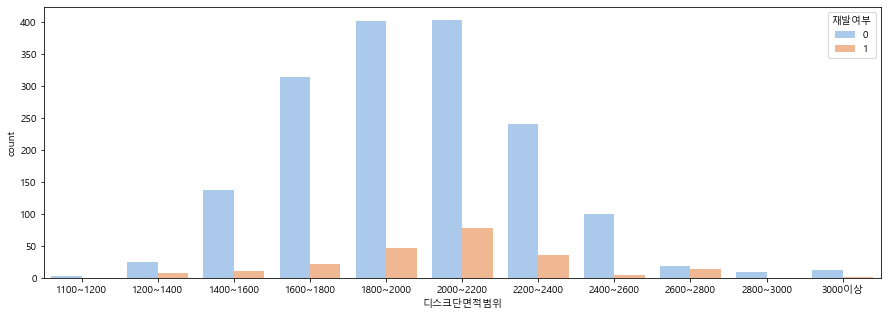

In [159]:
 # min 1145.8, max 3214.2
def Total_1(data):    
    if data < 1200:        
        return '1100~1200'
    elif data < 1400:
        return '1200~1400'
    elif data < 1600:
        return '1400~1600'
    elif data < 1800:
        return '1600~1800'
    elif data < 2000:
        return '1800~2000'
    elif data < 2200:
        return '2000~2200'
    elif data < 2400:
        return '2200~2400'
    elif data < 2600:
        return '2400~2600'
    elif data < 2800:
        return '2600~2800'
    elif data < 3000:
        return '2800~3000'
    else:
        return '3000이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (15, 5))  # 피규어 사이즈 확장 
data['디스크단면적범위'] = data['디스크단면적'].apply(Total_1)
sns.countplot(data = data.sort_values(by = '재발여부'), x='디스크단면적범위', hue = '재발여부', 
              order=['1100~1200','1200~1400','1400~1600','1600~1800','1800~2000','2000~2200',
                     '2200~2400','2400~2600','2600~2800','2800~3000','3000이상'])

(array([1000.000, 1500.000, 2000.000, 2500.000, 3000.000, 3500.000]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

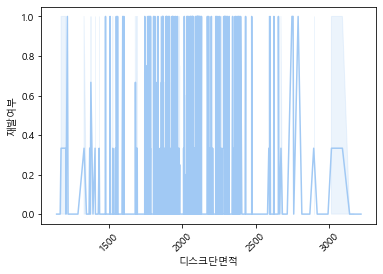

In [160]:
sns.lineplot(data=data, x= '디스크단면적', y = '재발여부')
plt.xticks(rotation=45)  # x라벨이 겹쳐서 글자 회전

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

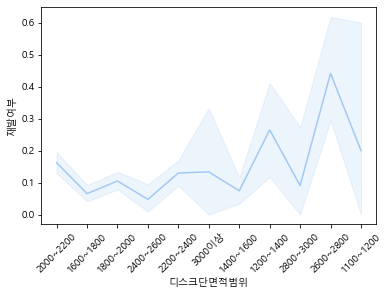

In [161]:
def Total_1(data):    
    if data < 1200:        
        return '1100~1200'
    elif data < 1400:
        return '1200~1400'
    elif data < 1600:
        return '1400~1600'
    elif data < 1800:
        return '1600~1800'
    elif data < 2000:
        return '1800~2000'
    elif data < 2200:
        return '2000~2200'
    elif data < 2400:
        return '2200~2400'
    elif data < 2600:
        return '2400~2600'
    elif data < 2800:
        return '2600~2800'
    elif data < 3000:
        return '2800~3000'
    else:
        return '3000이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정

data['디스크단면적범위'] = data['디스크단면적'].apply(Total_1)

sns.lineplot(data=data, x= '디스크단면적범위', y = '재발여부')
plt.xticks(rotation=45)  # x라벨이 겹쳐서 글자 회전